In [1]:
%pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

# Calculate Zipcode per listing

In [174]:
data = pd.read_csv('/home/loc/AI_and_data_Science/Airbnb/datasets/listings.csv')
data.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99
5,40143,https://www.airbnb.com/rooms/40143,20240316023852,2024-03-19,previous scrape,Stylish & Design 1BR flat- Voltaire Bastille,I have bought and redesigned completely my fla...,"The flat is located in Voltaire (11th), in a q...",https://a0.muscache.com/pictures/1659858e-41a7...,172322,...,4.88,4.88,5.00,NaN,f,1,1,0,0,0.07
6,7397,https://www.airbnb.com/rooms/7397,20240316023852,2024-03-18,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.88,4.93,4.73,7510400829623,f,6,6,0,0,2.21
7,40899,https://www.airbnb.com/rooms/40899,20240316023852,2024-03-18,city scrape,Lovely flat Canal Saint Martin Long stays,"Very bright and airy, with a lovely view over ...","La Place Sainte-Marthe, le canal Saint-Martin,...",https://a0.muscache.com/pictures/69330435/8e1a...,177130,...,4.93,4.79,4.72,7511000493125,f,1,1,0,0,0.92
8,41106,https://www.airbnb.com/rooms/41106,20240316023852,2024-03-16,city scrape,"Comfort & style (?) in le Marais, what else?",Bonjour :-)<br /><br />This apartment of 50 m2...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,177387,...,4.94,4.96,4.69,7510400114395,f,1,1,0,0,0.67
9,167998,https://www.airbnb.com/rooms/167998,20240316023852,2024-03-18,city scrape,"Cosy luxe, Central Paris.","A local neighbourhood filled with history, res...",NaN,https://a0.muscache.com/pictures/066c69ab-60ef...,469865,...,4.86,4.98,4.53,7510103301622,f,2,2,0,0,1.19


In [173]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [157]:
data[['host_neighbourhood']].filter(data[['host_neighbourhood']].isna())

num_nan_host_neighbourhood = data['host_neighbourhood'].isna().sum()
print(num_nan_host_neighbourhood)

49808


In [163]:
df = data[['name','price','description','host_location', 'latitude', 'longitude', 'host_neighbourhood']]
# df = df.head(10)
df

,name,price,description,host_location,latitude,longitude,host_neighbourhood
0,zen and calm,$250.00,Lovely Appartment with one bedroom with a Quee...,"Paris, France",48.831910,2.318700,Alésia
1,studio charme Haut Marais PARIS,$140.00,You'll love this typical parisian flat.,"Paris, France",48.866520,2.362610,III Arrondissement
2,Your perfect Paris studio on Île Saint-Louis,$107.00,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","Paris, France",48.852470,2.358350,Saint-Paul - Ile Saint-Louis
3,Big appartment with view 4 people,$200.00,"2 Bedrooms apartment for up to 4 people, with ...","Paris, France",48.876230,2.368690,Canal Saint-Martin
4,COSY INDEPENDENT ROOM IN CENTRAL PARIS,NaN,Large newly-renovated guest room in central Pa...,"Paris, France",48.870680,2.344600,II Arrondissement
...,...,...,...,...,...,...,...
84392,Artists neighbour apt /private yard 10mn Print...,$80.00,Simplify your life at this peaceful place<br /...,NaN,48.877789,2.341472,NaN
84393,Appartement Tour Eiffel - Porte Dauphine - 2 Pers,$167.00,Nestled in the heart of the prestigious 16th a...,NaN,48.855590,2.274670,NaN
84394,1621: Prime spot in Paris Olympic Games 2024,$98.00,Discover the allure of our generously proporti...,NaN,48.877712,2.337060,NaN
84395,Stylish flat in the heart of the city,$296.00,Welcome to Paris! We are delighted to welcome ...,NaN,48.853320,2.344220,NaN


In [120]:
import requests

In [152]:
import requests
import json
from multiprocessing import Pool
from time import sleep
from json.decoder import JSONDecodeError


def get_postcode(lat, lon):
    try:
        res = requests.get('https://nominatim.openstreetmap.org/reverse?lat={}&lon={}&format=json'.format(lat, lon))
        res.raise_for_status()  # Raise an exception for HTTP errors
        response = json.loads(res.text)
        sleep(2)
        if 'address' in response and 'postcode' in response['address']:
            return int(response['address']['postcode'])
        else:
            return None
    except (requests.RequestException, JSONDecodeError) as e:
        print(f"Error fetching postcode for latitude {lat} and longitude {lon}: {e}")
        return None

In [148]:
def process_with_bbox(df, bbox):
    lat_min, lon_min, lat_max, lon_max = bbox
    filtered_df = df[(df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) & (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)]
    postcodes = {}
    for index, row in filtered_df.iterrows():
        postcodes[index] = get_postcode(row['latitude'], row['longitude'])
    return postcodes


In [159]:
min_lat = df['latitude'].min()
min_lon = df['longitude'].min()
max_lat = df['latitude'].max()
max_lon = df['longitude'].max() 

In [160]:
bounding_box = (min_lat, min_lon, max_lat, max_lon)

In [161]:
postcodes = process_with_bbox(df, bounding_box)

Error fetching postcode for latitude 48.85247 and longitude 2.35835: 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/reverse?lat=48.85247&lon=2.35835&format=json
Error fetching postcode for latitude 48.87623 and longitude 2.36869: 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/reverse?lat=48.87623&lon=2.36869&format=json
Error fetching postcode for latitude 48.87068 and longitude 2.3446: 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/reverse?lat=48.87068&lon=2.3446&format=json
Error fetching postcode for latitude 48.85719 and longitude 2.37831: 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/reverse?lat=48.85719&lon=2.37831&format=json
Error fetching postcode for latitude 48.85909 and longitude 2.35315: 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/reverse?lat=48.85909&lon=2.35315&format=json
Error fetching postcode for latitude 48.87438 and longitude 2.37215

In [151]:
df['postcode'] = df.index.map(postcodes)

In [140]:
postcodes

{0: 75014,
 1: 75003,
 2: 75004,
 3: 75010,
 4: 75002,
 5: 75011,
 6: 75004,
 7: 75010,
 8: 75004,
 9: 75001}

In [141]:
df['postcode'] = df.index.map(postcodes)

In [142]:
df

,name,price,description,host_location,latitude,longitude,host_neighbourhood,postcode
0,zen and calm,$250.00,Lovely Appartment with one bedroom with a Quee...,"Paris, France",48.83191,2.31870,Alésia,75014
1,studio charme Haut Marais PARIS,$140.00,You'll love this typical parisian flat.,"Paris, France",48.86652,2.36261,III Arrondissement,75003
2,Your perfect Paris studio on Île Saint-Louis,$107.00,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","Paris, France",48.85247,2.35835,Saint-Paul - Ile Saint-Louis,75004
3,Big appartment with view 4 people,$200.00,"2 Bedrooms apartment for up to 4 people, with ...","Paris, France",48.87623,2.36869,Canal Saint-Martin,75010
4,COSY INDEPENDENT ROOM IN CENTRAL PARIS,NaN,Large newly-renovated guest room in central Pa...,"Paris, France",48.87068,2.34460,II Arrondissement,75002
5,Stylish & Design 1BR flat- Voltaire Bastille,NaN,I have bought and redesigned completely my fla...,"Paris, France",48.85719,2.37831,Bastille,75011
6,MARAIS - 2ROOMS APT - 2/4 PEOPLE,$134.00,"VERY CONVENIENT, WITH THE BEST LOCATION !","Paris, France",48.85909,2.35315,Le Marais,75004
7,Lovely flat Canal Saint Martin Long stays,$50.00,"Very bright and airy, with a lovely view over ...","Paris, France",48.87438,2.37215,Enclos-St-Laurent (X Arrondissement),75010
8,"Comfort & style (?) in le Marais, what else?",$265.00,Bonjour :-)<br /><br />This apartment of 50 m2...,"Paris, France",48.85634,2.35695,Le Marais,75004
9,"Cosy luxe, Central Paris.",$443.00,"A local neighbourhood filled with history, res...","Paris, France",48.86564,2.33184,Madeleine - Vendôme,75001


In [143]:
df[['postcode']]

,postcode
0,75014
1,75003
2,75004
3,75010
4,75002
5,75011
6,75004
7,75010
8,75004
9,75001


In [ ]:
# https://nominatim.openstreetmap.org/reverse?lat=48.831910&lon=2.318700&format=json

In [178]:
data[['name','neighbourhood_cleansed','neighbourhood_group_cleansed']]

,name,neighbourhood_cleansed,neighbourhood_group_cleansed
0,zen and calm,Observatoire,NaN
1,studio charme Haut Marais PARIS,Temple,NaN
2,Your perfect Paris studio on Île Saint-Louis,Hôtel-de-Ville,NaN
3,Big appartment with view 4 people,Entrepôt,NaN
4,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Bourse,NaN
...,...,...,...
84392,Artists neighbour apt /private yard 10mn Print...,Opéra,NaN
84393,Appartement Tour Eiffel - Porte Dauphine - 2 Pers,Passy,NaN
84394,1621: Prime spot in Paris Olympic Games 2024,Opéra,NaN
84395,Stylish flat in the heart of the city,Panthéon,NaN


# Study of Host that dont live in Paris

In [34]:
df = pd.read_csv('/home/loc/AI_and_data_Science/Airbnb/datasets/listings.csv')

## Cleanning

In [35]:
df.isnull().mean().sort_values(ascending=False) * 100

neighbourhood_group_cleansed    100.000000
calendar_updated                100.000000
host_neighbourhood               59.016316
host_about                       56.569546
neighborhood_overview            46.502838
                                   ...    
latitude                          0.000000
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
id                                0.000000
Length: 75, dtype: float64

In [24]:
df.sort_values(ascending=False, by = 'beds')

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
17247,20433587,https://www.airbnb.com/rooms/20433587,20240316023852,2024-03-18,city scrape,Hotel rooms heart of Saint-Germain des Prés Odeon,PERMANENT RECEPTION & ARRIVAL <br />Receptioni...,Saint-Germain des Prés is just the best place ...,https://a0.muscache.com/pictures/miso/Hosting-...,46443228,...,4.75,4.96,4.57,NaN,f,15,0,7,0,2.09
76378,1071020436354803291,https://www.airbnb.com/rooms/1071020436354803291,20240316023852,2024-03-19,city scrape,Hotels for Olympic Games 2024,Please read carefully!<br /><br />We are a spo...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,330044451,...,NaN,NaN,NaN,NaN,f,6,0,6,0,NaN
76331,1070960072975209098,https://www.airbnb.com/rooms/1070960072975209098,20240316023852,2024-03-19,city scrape,Hotels Paris 2024,Please read carefully!<br /><br />We are a spo...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,330044451,...,NaN,NaN,NaN,NaN,f,6,0,6,0,NaN
4599,4884557,https://www.airbnb.com/rooms/4884557,20240316023852,2024-03-18,city scrape,2 gîtes 6-7 chambres.Métro Jourdain ou Botzaris.,In PARIS<br />Two cottages separated by an inn...,"Au pied du Parc des BUTTES CHAUMONT,non loin d...",https://a0.muscache.com/pictures/34b2112f-0376...,12840850,...,4.63,4.60,4.48,7511909656408,f,3,3,0,0,1.18
46620,729468830726782521,https://www.airbnb.com/rooms/729468830726782521,20240316023852,2024-03-19,city scrape,"Studio By "" Linda ""","This special place is close to everything, mak...","en plein coeur de Paris 11 ème ,super résident...",https://a0.muscache.com/pictures/hosting/Hosti...,469009993,...,4.61,4.57,4.14,7511107383462,t,3,3,0,0,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80052,1089714103986173954,https://www.airbnb.com/rooms/1089714103986173954,20240316023852,2024-03-19,previous scrape,Vexin - 1 chambre à Montmartre,Our mission is to allow individuals to immerse...,"Situé sur une colline du 18e arrondissement, l...",https://a0.muscache.com/pictures/prohost-api/H...,489964484,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,69,69,0,0,NaN
80158,1089792608267990973,https://www.airbnb.com/rooms/1089792608267990973,20240316023852,2024-03-18,previous scrape,Beau cocon - proche Sacré-Cœur,"In the 18ᵉ arrondissement, this quiet 44 m² ap...",The 18th arrondissement is in the north of Par...,https://a0.muscache.com/pictures/prohost-api/H...,561357977,...,NaN,NaN,NaN,7511811431436,f,1,1,0,0,NaN
80159,1090573134171110492,https://www.airbnb.com/rooms/1090573134171110492,20240316023852,2024-03-18,previous scrape,Appartement calme et confortable,"The apartment is part of a family residence, q...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,57780871,...,NaN,NaN,NaN,7511111739653,f,1,1,0,0,NaN
80162,1089799445843880628,https://www.airbnb.com/rooms/1089799445843880628,20240316023852,2024-03-16,previous scrape,宁静公园旁的温馨公寓,Welcome to My apartment!The apartment was reno...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,106802916,...,5.00,5.00,5.00,7512011744948,f,5,1,4,0,2.00


In [36]:
print(df.duplicated().sum())
if df.duplicated().sum()>0:
    df.drop_duplicates()

0


In [37]:
print(df.isnull().sum())
# Maintenant on va remplacer/modifier les colonnes ayant des valeurs nuls
cols_evaluations = [
  'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
  'review_scores_value'
]
for col in cols_evaluations:
    df[col].fillna(df[col].mean(), inplace=True)

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               25575
Length: 75, dtype: int64


In [38]:
df = df[[
        'name',
        'host_location',
        'host_neighbourhood',
        'neighbourhood_cleansed',
        'price',
        'review_scores_rating',
        'host_listings_count',
        'availability_30',
        'minimum_nights',
        'bathrooms',
        'latitude', 
        'longitude', 
        'minimum_nights', 
        'number_of_reviews'
        ]]
df

,name,host_location,host_neighbourhood,neighbourhood_cleansed,price,review_scores_rating,host_listings_count,availability_30,minimum_nights,bathrooms,latitude,longitude,minimum_nights,number_of_reviews
0,zen and calm,"Paris, France",Alésia,Observatoire,$250.00,5.000000,1.0,29,2,1.0,48.831910,2.318700,2,4
1,studio charme Haut Marais PARIS,"Paris, France",III Arrondissement,Temple,$140.00,4.680000,1.0,15,3,1.0,48.866520,2.362610,3,106
2,Your perfect Paris studio on Île Saint-Louis,"Paris, France",Saint-Paul - Ile Saint-Louis,Hôtel-de-Ville,$107.00,4.600000,2.0,0,1,1.0,48.852470,2.358350,1,393
3,Big appartment with view 4 people,"Paris, France",Canal Saint-Martin,Entrepôt,$200.00,4.560000,1.0,29,2,1.0,48.876230,2.368690,2,78
4,COSY INDEPENDENT ROOM IN CENTRAL PARIS,"Paris, France",II Arrondissement,Bourse,NaN,4.860000,1.0,0,5,NaN,48.870680,2.344600,5,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84392,Artists neighbour apt /private yard 10mn Print...,NaN,NaN,Opéra,$80.00,4.712364,17.0,24,1,1.0,48.877789,2.341472,1,0
84393,Appartement Tour Eiffel - Porte Dauphine - 2 Pers,NaN,NaN,Passy,$167.00,4.712364,11.0,7,1,1.0,48.855590,2.274670,1,0
84394,1621: Prime spot in Paris Olympic Games 2024,NaN,NaN,Opéra,$98.00,4.712364,24.0,21,1,1.0,48.877712,2.337060,1,0
84395,Stylish flat in the heart of the city,NaN,NaN,Panthéon,$296.00,4.712364,59.0,21,3,1.0,48.853320,2.344220,3,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    84397 non-null  object 
 1   host_location           67810 non-null  object 
 2   host_neighbourhood      34589 non-null  object 
 3   neighbourhood_cleansed  84397 non-null  object 
 4   price                   60917 non-null  object 
 5   review_scores_rating    84397 non-null  float64
 6   host_listings_count     84390 non-null  float64
 7   availability_30         84397 non-null  int64  
 8   minimum_nights          84397 non-null  int64  
 9   bathrooms               60959 non-null  float64
 10  latitude                84397 non-null  float64
 11  longitude               84397 non-null  float64
 12  minimum_nights          84397 non-null  int64  
 13  number_of_reviews       84397 non-null  int64  
dtypes: float64(5), int64(4), object(5)
mem

In [ ]:
df["price"] = df["price"].str.replace(',', '').astype(float)

In [53]:
df['neighbourhood_cleansed'].astype(str)

0          Observatoire
1                Temple
2        Hôtel-de-Ville
3              Entrepôt
4                Bourse
              ...      
84392             Opéra
84393             Passy
84394             Opéra
84395          Panthéon
84396      Observatoire
Name: neighbourhood_cleansed, Length: 84397, dtype: object

In [49]:
average_price = df['price'].mean()
df['price'].fillna(average_price, inplace=True)

In [50]:
df['price']

0        250.00000
1        140.00000
2        107.00000
3        200.00000
4        288.66241
           ...    
84392     80.00000
84393    167.00000
84394     98.00000
84395    296.00000
84396     71.00000
Name: price, Length: 84397, dtype: float64

In [54]:
df['host_location'].fillna('Paris, France', inplace=True)

In [55]:
df['host_location'].isnull().sum()

0

## Study

In [51]:
filtered_df = df[(df['host_location'] != 'Paris, France') & (~df['host_location'].isin(df['neighbourhood_cleansed']))]
filtered_host_locations = filtered_df['host_location']
df_filter = [[filtered_host_locations]]
df_filter

[[16               Recife, Brazil
  19                 New York, NY
  37                       France
  42       Abidjan, Côte d’Ivoire
  44                       France
                    ...          
  84392                       NaN
  84393                       NaN
  84394                       NaN
  84395                       NaN
  84396                       NaN
  Name: host_location, Length: 25612, dtype: object]]

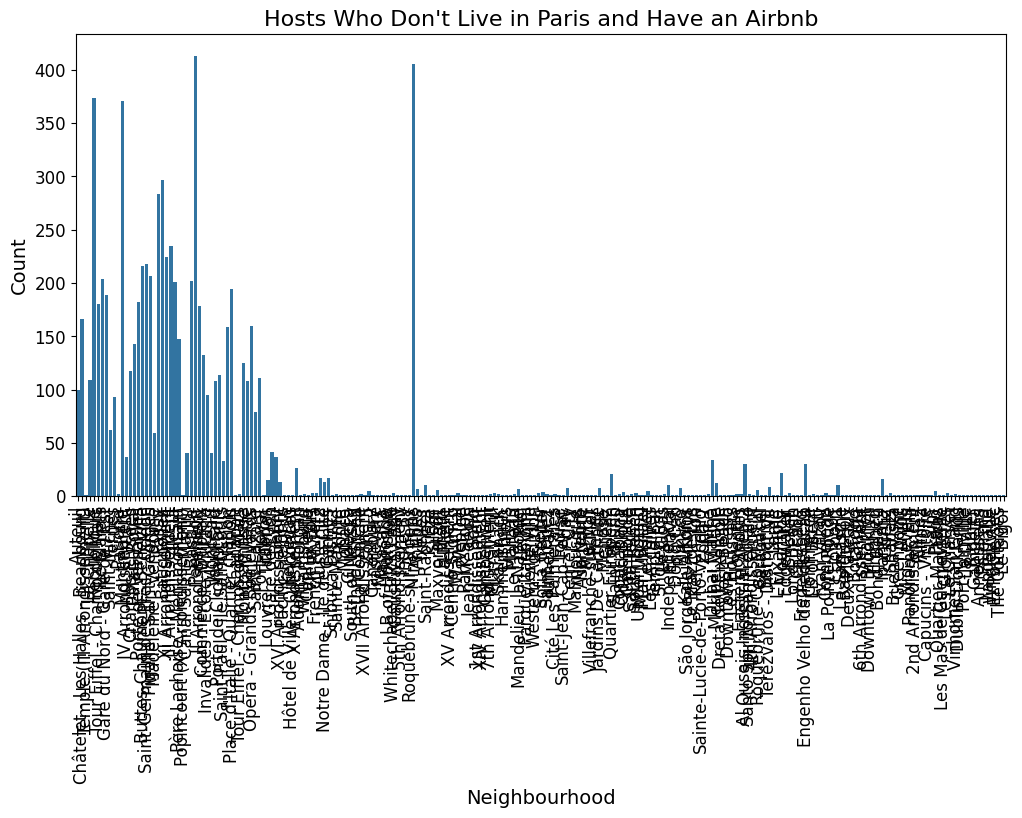

In [40]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(data=filtered_df, x='host_neighbourhood')

# Set the plot title and labels with increased font size
plt.title("Hosts Who Live in Paris and Have an Airbnb", fontsize=16)
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Increase the font size of x-axis and y-axis tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

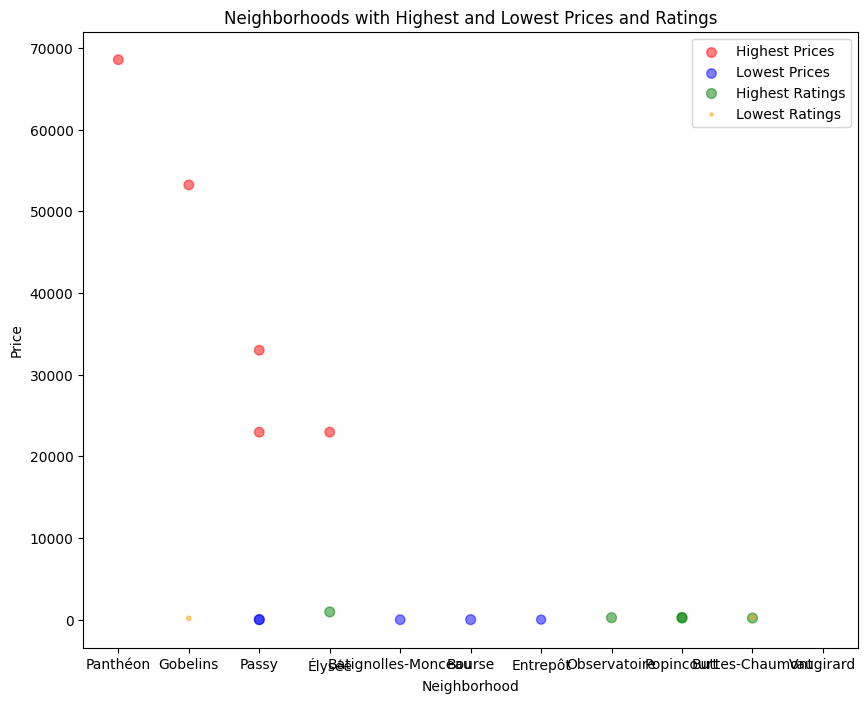

In [57]:
import matplotlib.pyplot as plt

# Filter the dataframe to get the neighborhoods with highest and lowest prices
highest_prices = df.nlargest(5, 'price')
lowest_prices = df.nsmallest(5, 'price')

# Filter the dataframe to get the neighborhoods with highest and lowest ratings
highest_ratings = df.nlargest(5, 'review_scores_rating')
lowest_ratings = df.nsmallest(5, 'review_scores_rating')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the neighborhoods with highest prices
ax.scatter(highest_prices['neighbourhood_cleansed'], highest_prices['price'], s=highest_prices['review_scores_rating']*10, c='red', alpha=0.5, label='Highest Prices')

# Plot the neighborhoods with lowest prices
ax.scatter(lowest_prices['neighbourhood_cleansed'], lowest_prices['price'], s=lowest_prices['review_scores_rating']*10, c='blue', alpha=0.5, label='Lowest Prices')

# Plot the neighborhoods with highest ratings
ax.scatter(highest_ratings['neighbourhood_cleansed'], highest_ratings['price'], s=highest_ratings['review_scores_rating']*10, c='green', alpha=0.5, label='Highest Ratings')

# Plot the neighborhoods with lowest ratings
ax.scatter(lowest_ratings['neighbourhood_cleansed'], lowest_ratings['price'], s=lowest_ratings['review_scores_rating']*10, c='orange', alpha=0.5, label='Lowest Ratings')

# Set labels and title
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Price')
ax.set_title('Neighborhoods with Highest and Lowest Prices and Ratings')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [61]:
most_expensive_neighborhood = df.groupby('neighbourhood_cleansed')['price'].sum().sort_values(ascending=False).index[0]
most_expensive_neighborhood

'Passy'

In [62]:
cheapest_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(1)
cheapest_neighborhood

neighbourhood_cleansed
Ménilmontant    224.612976
Name: price, dtype: float64

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
# df = pd.read_csv('airbnb_listings.csv')

# Preprocess the data


# Select features and target
features = ['minimum_nights', 'availability_30','review_scores_rating', 'number_of_reviews']
target = ['price']
X = df[features]
y = df[target]


In [88]:
X

,minimum_nights,minimum_nights,availability_30,review_scores_rating,number_of_reviews
0,2,2,29,5.000000,4
1,3,3,15,4.680000,106
2,1,1,0,4.600000,393
3,2,2,29,4.560000,78
4,5,5,0,4.860000,126
...,...,...,...,...,...
84392,1,1,24,4.712364,0
84393,1,1,7,4.712364,0
84394,1,1,21,4.712364,0
84395,3,3,21,4.712364,0


In [89]:
y

,price
0,250.00000
1,140.00000
2,107.00000
3,200.00000
4,288.66241
...,...
84392,80.00000
84393,167.00000
84394,98.00000
84395,296.00000


In [90]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train

,minimum_nights,minimum_nights,availability_30,review_scores_rating,number_of_reviews
56015,1,1,30,4.670000,3
12545,365,365,0,5.000000,5
36313,120,120,0,4.712364,0
59749,2,2,0,5.000000,24
604,365,365,1,4.450000,162
...,...,...,...,...,...
6265,2,2,0,4.890000,9
54886,2,2,23,4.890000,18
76820,3,3,0,4.750000,3
860,2,2,9,4.880000,180


In [92]:
y_train

,price
56015,80.00000
12545,288.66241
36313,137.00000
59749,200.00000
604,288.66241
...,...
6265,288.66241
54886,80.00000
76820,62.00000
860,457.00000


In [93]:
X_test

,minimum_nights,minimum_nights,availability_30,review_scores_rating,number_of_reviews
29183,3,3,7,4.970000,114
16706,1,1,0,4.712364,0
19034,365,365,0,4.440000,9
83022,3,3,13,4.712364,0
80515,1,1,29,4.712364,0
...,...,...,...,...,...
56489,2,2,0,4.712364,0
61376,1,1,0,4.712364,0
75784,1,1,29,4.712364,0
41099,1,1,24,3.950000,19


In [94]:
y_test

,price
29183,130.00000
16706,288.66241
19034,288.66241
83022,75.00000
80515,512.00000
...,...
56489,288.66241
61376,288.66241
75784,560.00000
41099,77.00000


In [96]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Test the model
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 278724.1429398204
